### GEOPH-526 : Signal Processing in Geophysics.
##### Department of Physics,  University of Alberta, Fall 2021.


**Professor**: Mauricio D. Sacchi

**Student**: Joaquín Acedo

**email**: aacedo@ualberta.ca






In [1]:
using DSP, FFTW, PyPlot


## Assignment 1: 

### 1) Consider a Square Wave of period  T = 100 sec:

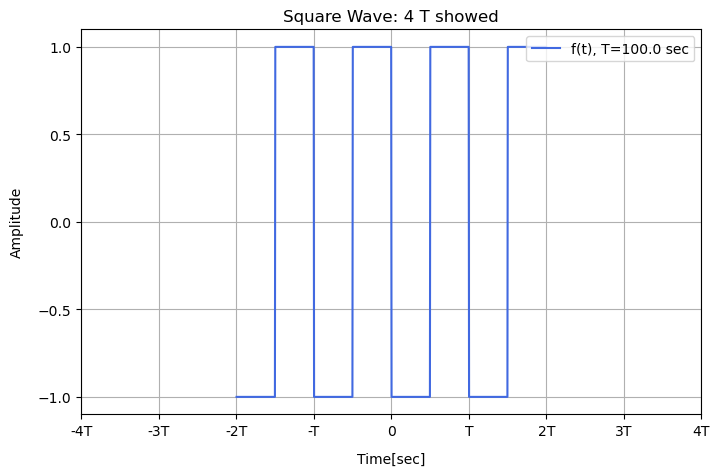

In [2]:
# Ploting the square wave:


T=100.0; # period length
dt=0.5; #
N= Int((T/dt)/2);
p=4; #number of periods showed


square=[-1ones(N);1*ones(N)]; # one period of the square wave

squarewave=repeat(square,p); # square wave of p periods.
t=collect(p*(-T/2)+dt/2:dt:p*(T/2)-dt/2); # time vector

# Display squarewave
figure(1,figsize=(8,5));
plt.plot(t,squarewave, c="RoyalBlue", label="f(t), T=$T sec");
plt.grid("True");
plt.title("Square Wave: $p T showed");
plt.xlabel("Time[sec]", labelpad=10.0);
plt.xticks(-4T:T:4T,["-4T","-3T","-2T","-T",0, "T", "2T", "3T", "4T"]);
plt.ylabel("Amplitude", labelpad=10.0);
plt.yticks(-1:0.5:1);
plt.legend(loc="upper right");


### a. Find the coefficients $F_n$ of the Fourier series:

The form of the square wave is given by:

\begin{equation}
{f}(t) = \begin{cases}
1, &  \; t=[-T/2,0];\\ -1, &  \;t=[0, T/2];
\end{cases}
\end{equation}

To Fourier coefficients are computed with the following equation:

$$ F_n = \frac{1}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} f\left(t\right)e^{-i\omega_n t} \,dt $$ 


$$ F_n = \frac{1}{T} \int_{-\frac{T}{2}}^{0} 1 e^{-i\omega_n t} \,dt - \frac{1}{T} \int_{0 }^{\frac{T}{2}} 1 e^{-i\omega_n t} \,dt $$ 



$$ F_n = -\frac{i}{T\omega_n} ( e^{i\omega_n\frac{T}{2}} -1) - \left[ -\frac{i}{T\omega_n} ( 1- e^{-i\omega_n\frac{T}{2}}) \right] $$


$$ F_n = \frac{2i}{T\omega_n} - \frac{i}{T\omega_n}( e^{i\omega_n\frac{T}{2}} +  e^{-i\omega_n\frac{T}{2}})$$


$$ F_n = \frac{2i}{T\omega_n} - \frac{i}{T\omega_n}(2cos(\omega_n\frac{T}{2}))$$



$$ F_n = \frac{2i}{T\omega_n} ( 1 -cos(\omega_n\frac{T}{2}))$$



$\;\;\;\;\;\;$

$\;\;\;\;\;\;$

### b. Plot the signal and the Fourier Synthesis for N= 1,3, 20, 40

In [3]:
# Function to compute Fourier Coefficients and Fourier Series of the square wave

function exercise1(nf :: Int64, T :: Float64)
    
    ω0=2*π/T;
    Fnp=zeros(Complex{Float64},nf); # Positive Coefficients
    Fnn=zeros(Complex{Float64},nf); # Negative Coefficients
    
    
    
#Fourier Coefficients: Lopp to compute Fn.
    
    for n=1:1:nf;
        ωn=ω0*n
        Fnp[n]=((2im)/(T*ωn))*(1 - cos(ωn*(T/2)));
        Fnn[n]=((2im)/(-1*T*ωn))*(1 - cos(-1*ωn*(T/2)));
    end
    
    f=zeros(length(t));
    
    
# Fourier Serie: Loop to compute Fourier Series.
    
    for n=1:nf;
        for i=1:length(f);
            ωn=ω0*n;
            f[i] = f[i] + Fnp[n]*exp(im*ωn*t[i])+ Fnn[n]*exp(-im*(ωn)*t[i]);
        end
    end
    
    return Fnp,Fnn,f
end


exercise1 (generic function with 1 method)

In [8]:
# Call the function to calculate different fourier synthesis for the square wave:

N=[1,3,20,40];
Fnp,Fnn,f1=exercise1(N[1],T);
Fnp2,Fnn2,f2=exercise1(N[2],T);
Fnp3,Fnn3,f3=exercise1(N[3],T);
Fnp4,Fnn4,f4=exercise1(N[4],T);




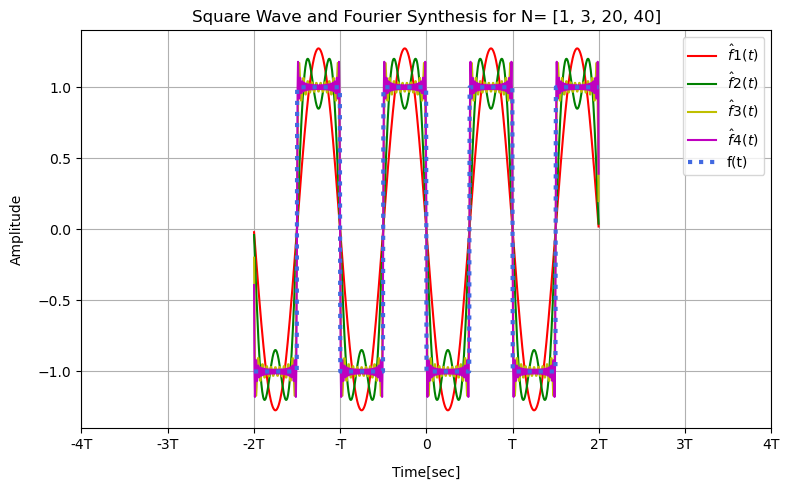

In [9]:
# Plot the results:

figure(16,figsize=(8,5),tight_layout=true);
plt.plot(t,f1, c="r",label=L"\hat f1(t)")
plt.plot(t,f2, c="g",label=L"\hat f2(t)")
plt.plot(t,f3, c="y",label=L"\hat f3(t)")
plt.plot(t,f4, c="m",label=L"\hat f4(t)")
plt.plot(t,squarewave, ":", c="RoyalBlue", label="f(t)", linewidth=3.0);
plt.grid("True");
plt.title("Square Wave and Fourier Synthesis for N= $N");
plt.xlabel("Time[sec]", labelpad=10.0);
plt.xticks(-4T:T:4T,["-4T","-3T","-2T","-T",0, "T", "2T", "3T", "4T"]);
plt.ylabel("Amplitude", labelpad=10.0);
plt.yticks(-1:0.5:1);
plt.legend(loc="upper right");

### c. Plot the spectrum of discrete amplitudes for $n= \left.[ -50,50\right]$

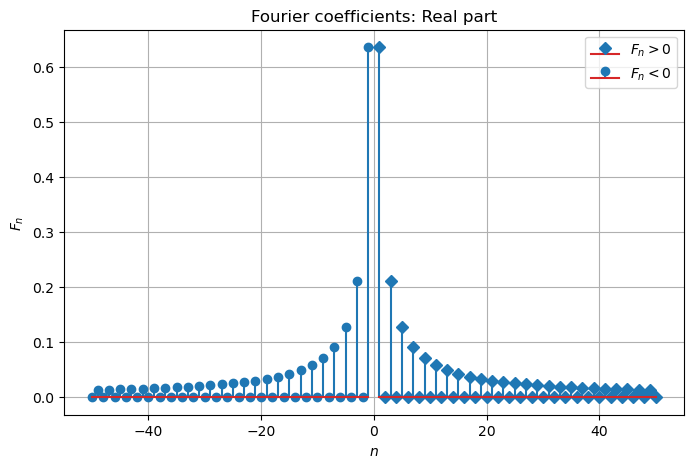

PyObject <matplotlib.legend.Legend object at 0x0000000061AAA4F0>

In [10]:
#Fourier Coefficient: # all the even coefficients are 0

Fnp,Fnn,f=exercise1(50,T);

Np=[i for i=1:50]
Nn=[i for i=-1:-1:-50]


figure(22, figsize=(8,5))
plt.stem(Np,abs.(Fnp),markerfmt="D",label=L"F_n >0");
plt.stem(Nn,abs.(Fnn), label=L"F_n <0");
plt.grid("True")
plt.title("Fourier coefficients: Real part")
plt.xlabel(L"n")
plt.ylabel(L"F_n")
plt.legend(loc="best")




### 2) Prove the following properties of the Fourier transform:

a. Linearity

b. Time delay

c. Time convolution

d. Symmetry


The **Fourier Transform** and the **Inverse Fourier Transform** of a signal are respectively given by:

$F\left(\omega\right) = \int_{-\infty}^{\infty} f\left(t\right)e^{-i\omega t} \,dt$ 

$f\left(t\right)= \frac{1}{2\pi}\int_{-\infty}^{\infty} F \left(\omega\right)e^{ i\omega t} \,d\omega$


### a. **Linearity**


If we apply the Fourier Transform ($\mathcal{F}$) to the sum of two scaled signals:


$\mathcal{F}\left(c_1f_1\left(t\right)+c_2f_2\left(t\right)\right)= \int_{-\infty}^{\infty} (c_1f_1\left(t\right)+c_2f_2\left(t\right))e^{-i\omega t} \,dt = c_1\int_{-\infty}^{\infty} f_1\left(t\right)e^{-i\omega t} \,dt +c_2\int_{-\infty}^{\infty} f_2\left(t\right)e^{-i\omega t}\,dt=  c_1\mathcal{F}\left(f_1\left(t\right)\right) +  c_2\mathcal{F}\left(f_2\left(t\right)\right)= c_1F_1 \left(\omega\right)+ c_2F_2 \left(\omega\right)$


Therefore,**the Fourier Transform of the sum of two different signals is equal to the sum of the Fourier Transform of the signals. Moreover, the Fourier Transform of a signal which has a scalar applied is equal to the Fourier Transform of the signal scaled by the same factor.**



### b. **Time delay property**

$\mathcal{F}\left(f\left(t-\tau\right)\right)=\int_{-\infty}^{\infty} f \left(t-\tau\right)e^{-i\omega t} \,dt$

if we replace $t'= t-\tau$ where $dt'=dt$ and we operate we obtain:


$\mathcal{F}\left(f\left(t-\tau\right)\right) =  (e^{-i\omega \tau})\int_{-\infty}^{\infty} f\left(t\right)e^{-i\omega t} \,dt= F \left(\omega\right)e^{ -i\omega\tau}$.

This demostrates that a constant shift in time **represents a phase shift in the frequency domain, which in turn modify the structure of the signal, but it does not alter the amplitude spectrum or the energy content of the signal**. This property can be used to advance or delay a signal in time.

### c. **Time convolution**

By definition: 


$$f(t) \ast g(t) = \int_{-\infty}^{\infty} f\left(t\right)g\left(u-t\right) \,dt$$


Taking the Fourier Transform of the convolution: 

$\mathcal{F}(f(t) \ast g(t))= \int_{-\infty}^{\infty} \left[ \int_{-\infty}^{\infty} f\left(t\right)g\left(u-t\right) \,dt \right] e^{-i\omega u} \,du$


Changing the ordder of integration:


$\mathcal{F}(f(t) \ast g(t))= \int_{-\infty}^{\infty} f\left(t\right) \left[ \int_{-\infty}^{\infty} g\left(u-t\right)e^{-i\omega u} \,du  \right]\,dt$


By the shift property (**b. Time delay property**):


$\int_{-\infty}^{\infty} g\left(u-t\right)e^{-i\omega u} \,du = G \left(\omega\right)e^{-i\omega t}$

Therefore:

$\mathcal{F}(f(t) \ast g(t))= \int_{-\infty}^{\infty} f\left(t\right) \left[ \int_{-\infty}^{\infty} g\left(u-t\right)e^{-i\omega u} \,du\right]\,dt = \int_{-\infty}^{\infty} f\left(t\right) G \left(\omega\right)e^{-i\omega t} \,dt$


$\int_{-\infty}^{\infty} f\left(t\right) G \left(\omega\right)e^{-i\omega t} \,dt=  G \left(\omega\right) \left[ \int_{-\infty}^{\infty} f\left(t\right)e^{-i\omega t} \,dt \right]= F \left(\omega\right) G \left(\omega\right)$


Finally, 

$$f(t) \ast g(t) = F \left(\omega\right) G \left(\omega\right)$$


The **FourierTransform of convolution in space/time domain is equivalent
to multiplication in the frequency domain.**


### d. **Symmetry**:

If $f\left(t\right)$ is real can be written as a sum of an even  ($f_e\left(t\right)$) and an odd  ($f_o\left(t\right)$) function:


$$f\left(t\right) = f_e\left(t\right) + f_o\left(t\right)$$ 


The Fourier Transform of $f\left(t\right)$ is:


$$F\left(\omega\right) = \int_{-\infty}^{\infty} (f_e\left(t\right) + f_o\left(t\right))e^{-i\omega t} \,dt$$ 

$$F\left(\omega\right) = \int_{-\infty}^{\infty} (f_e\left(t\right) + f_o\left(t\right)) (cos(\omega t) -isen(\omega t)) \,dt$$ 


#### Using the following properties:

1.**The product of two odd functions or two even functions is even.**

2.**The product of an even and an even function is odd.**

3.**The integral of an odd function from $-t_1$ to $+t_1$ is zero.**





$\;\;\;\;\;\;$

$\;\;\;\;\;\;$




$$F \left(\omega\right) = \int_{-\infty}^{\infty} (f_e\left(t\right)cos(\omega t) - if_o\left(t\right)sen(\omega t))\,dt = F_e \left(\omega\right) +F_o \left(\omega\right) $$ 


$F_e \left(\omega\right)$ and $F_o \left(\omega\right)$ are given by:


$$F_e \left(\omega\right)=\int_{-\infty}^{\infty} f_e\left(t\right)cos(\omega t)\,dt$$

$$F_o \left(\omega\right)=\int_{-\infty}^{\infty} if_o\left(t\right)sen(\omega t)\,dt$$


$\;\;\;\;\;\;$

$\;\;\;\;\;\;$


Therefore, if $f\left(t\right)$ is real $F\left(\omega\right)$ is complex, but the real part is even and the imaginary part is odd. Which means:

$$F\left(\omega\right)= F^{*}\left(-\omega\right)= F\left(-\omega\right)$$

$$Re(F\left(\omega\right))= Re(F\left(-\omega\right))$$

$$Im(F\left(\omega\right))= -Im(F\left(-\omega\right))$$


In the particular case in which $f\left(t\right)$ is real and even. The symmerty property shows:

$$Re(F\left(\omega\right))= Re(F\left(-\omega\right))$$

$$Im(F\left(\omega\right))= 0$$



$\;\;\;\;\;\;$

$\;\;\;\;\;\;$

$\;\;\;\;\;\;$

$\;\;\;\;\;\;$

### 3) By using the fact that $\mathcal{F}(e^{i\omega_0t})= 2\pi\delta(\omega-\omega_0)$ find the Fourier Transform of the following signals:


$c_{(t)}=cos(i\omega_0t)$

$s_{(t)}=sin(i\omega_0t)$


$p_{(t)}=sin(i\omega_0t +\alpha)$





$\;\;\;\;\;\;$

$\;\;\;\;\;\;$

### a. 

### $\mathcal{F}(cos(i\omega_0t))= \int_{-\infty}^{\infty} cos(i\omega_0t)\left(t\right)e^{-i\omega t} \,dt$

### $\int_{-\infty}^{\infty} cos(i\omega_0t)e^{-i\omega t} \,dt= \int_{-\infty}^{\infty} \frac{e^{i\omega_0t}+e^{-i\omega_0t}}{2}e^{-i\omega t} \,dt=$ 

### $\frac{1}{2}\int_{-\infty}^{\infty} e^{i\omega_0t}e^{-i\omega t} \,dt+ \frac{1}{2}\int_{-\infty}^{\infty} e^{-i\omega_0t}e^{-i\omega t} \,dt=$ 

### $\frac{1}{2}\int_{-\infty}^{\infty} e^{-i(\omega-\omega_0)t}\,dt+ \frac{1}{2}\int_{-\infty}^{\infty} e^{-i(\omega+\omega_0)t}\,dt=$ 

### $\pi(\delta(\omega - \omega_0)+\delta(\omega+\omega_0))$


$\;\;\;\;\;\;$

$\;\;\;\;\;\;$


### b. 


### $\mathcal{F}(sin(i\omega_0t))= \int_{-\infty}^{\infty} sin(i\omega_0t)\left(t\right)e^{-i\omega t} \,dt$


### $\int_{-\infty}^{\infty} sin(i\omega_0t)e^{-i\omega t} \,dt= \int_{-\infty}^{\infty} \frac{e^{i\omega_0t}-e^{-i\omega_0t}}{2}e^{-i\omega t} \,dt=$ 


### $\frac{1}{2}\int_{-\infty}^{\infty} e^{i\omega_0t}e^{-i\omega t} \,dt - \frac{1}{2}\int_{-\infty}^{\infty} e^{-i\omega_0t}e^{-i\omega t} \,dt=$ 



### $\frac{1}{2}\int_{-\infty}^{\infty} e^{-i(\omega-\omega_0)t}\,dt - \frac{1}{2}\int_{-\infty}^{\infty} e^{-i(\omega+\omega_0)t}\,dt=$ 


### $\pi(\delta(\omega - \omega_0)-\delta(\omega+\omega_0))$

$\;\;\;\;\;\;$

$\;\;\;\;\;\;$

### c. 

### $\mathcal{F}(sin(i\omega_0t+\alpha))= \int_{-\infty}^{\infty} sin(i\omega_0t+\alpha)\left(t\right)e^{-i\omega t} \,dt$


### $\int_{-\infty}^{\infty} sin(i\omega_0t+\alpha)e^{-i\omega t} \,dt= \int_{-\infty}^{\infty} \frac{e^{i\omega_0t+\alpha}- e^{-i\omega_0t+\alpha}}{2}e^{-i\omega t} \,dt=$ 


### $\frac{1}{2} e^{i\alpha}\int_{-\infty}^{\infty} e^{i\omega_0t}e^{-i\omega t} \,dt - \frac{1}{2}e^{-i\alpha}\int_{-\infty}^{\infty} e^{-i\omega_0t}e^{-i\omega t} \,dt=$ 

### $\frac{1}{2} e^{i\alpha}\int_{-\infty}^{\infty} e^{-i(\omega-\omega_0)t}\,dt - \frac{1}{2} e^{-i\alpha}\int_{-\infty}^{\infty} e^{-i(\omega+\omega_0)t}\,dt=$ 

### $\pi( e^{i\alpha}\delta(\omega - \omega_0)- e^{-i\alpha}\delta(\omega+\omega_0))$


$\;\;\;\;\;\;$

$\;\;\;\;\;\;$

$\;\;\;\;\;\;$

$\;\;\;\;\;\;$


### 4) Compute the Fourier Transform of  $f\left(t\right)=e^{i\omega_0t}$  $t=\left[ \frac{-T}{2},\frac{T}{2}\right]$ and $\omega_0=0.3$.

We are observing the signal in a finite interval of time. This truncation in time is equivalent to multiply the signal by a window:

$$f_T\left(t\right)= f\left(t\right) w\left(t\right)$$


In this case, the window is a box function defined by:


\begin{equation}
{f}(t) = \begin{cases}
1, &  \; t \leq|\frac{T}{2}|;\\ 0, & t > |\frac{T}{2}| ;
\end{cases}
\end{equation}

**The Fourier transform of the windowed signal is a multiplication in the time domain and a convolution in the frequency domain given by**:

$$\mathcal{F} \left\{ f_T\left(t\right)\right\}=\mathcal{F} \left\{ f\left(t\right) w\left(t\right)\right\}= \frac{1}{2\pi}F \left(\omega\right)\ast W\left(\omega\right)$$ 


Taking into account that the Fourier Transforms for the complex exponential and for the boxcar functions are respectively:


$$\mathcal{F} \left\{ f\left(t\right)\right\}=2\pi\delta(\omega-\omega_0)$$ 

$$\mathcal{F} \left\{ w\left(t\right)\right\}= Tsinc(\omega\frac{T}{2})$$

The convolution in the frequency domain is given by:



$$\mathcal{F} \left\{ f_T\left(t\right)\right\}=  \frac{1}{2\pi}\int_{-\infty}^{\infty} 2\pi\delta(u-\omega_0) T sinc((\omega-u)\frac{T}{2}) \,du = T sinc((\omega-\omega_0)\frac{T}{2})$$


We interpret that if we observe the signal in a finite interval of time (we truncate the signal with a window of defined length), we are not going to obtain the exact Fourier Transform of the signal. We are obtaining the Fourier Transform of the signal convolved in the Frequency domain with a "$sinc$" function of period $T$. 



In the case in which the $T \to \infty$ this sinc function goes to a \delta function and we recover the exact Fourier Transform of the signal. 


In a practical way, we get an intuition that we need to observe the signal for sufficient time to reproduce its spectrum. On the other hand, when time is insufficient, we are convolving the spectrum of the signal with a broad $sinc$ and losing details of the spectrum.




**Example:** Ploting amplitude spectrum for different window lengths (time periods) $T=\left[5.0,10.0,20.0,50.0\right]$ sec.

In [179]:
#function to compute to sincs that are the TF of the two functions.

function exercise4(T :: Float64, ω1 :: Float64)
    
    dω=0.01;
    ω= -5.0:dω:5.0;
    n=length(ω)
    sinc1=zeros(n)
    sinc1= abs.(T*sinc.((ω .-ω1)*T/2))
    return ω, sinc1;
end


exercise4 (generic function with 1 method)

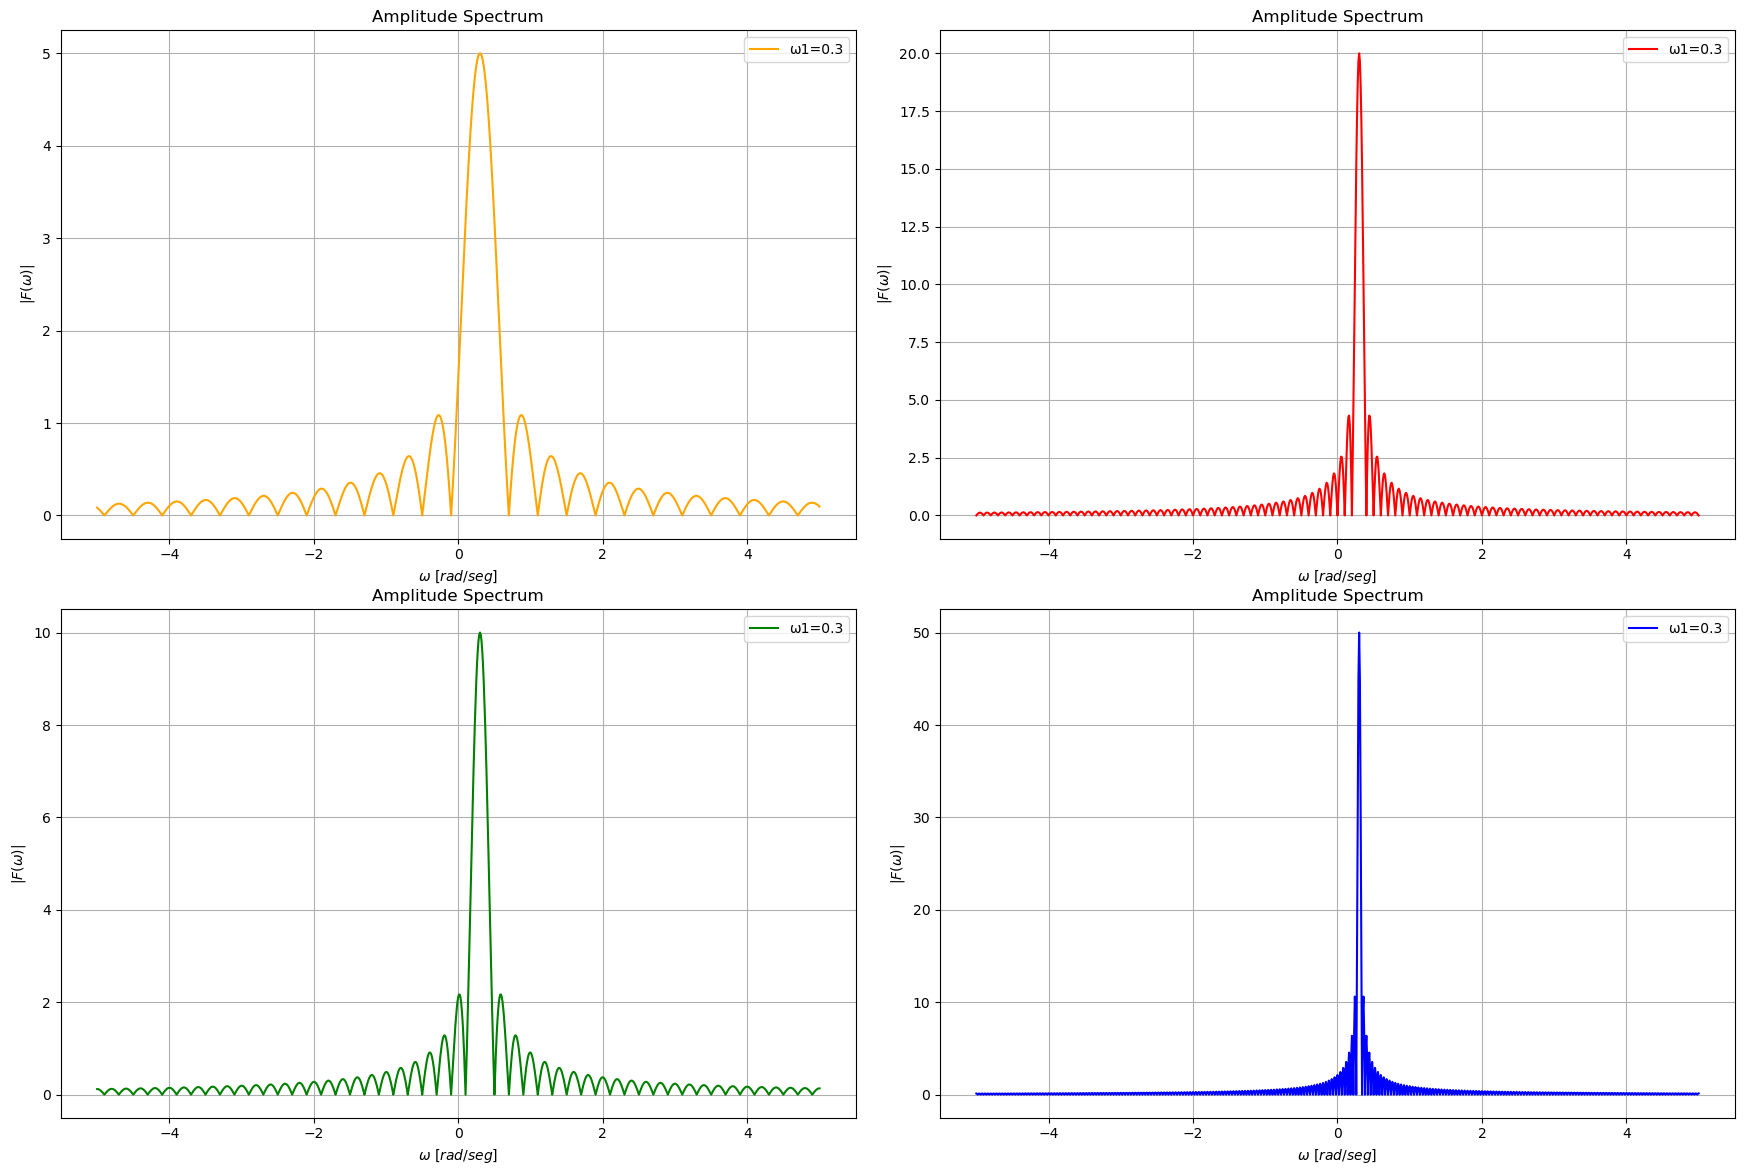

In [180]:
T=[5.0,10.0,20.0,50.0];
ω1=0.3;



# ploting the results
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.tight_layout(pad=3.0)
colors=["orange","green","red","blue"]

for i in 1:2
    #f,amp,phase,t,w,periodo=exercise3(dt,ω0,T[i])
    ω,s=exercise4(T[i],ω1);
    axs[i,1].plot(ω,s, c=colors[i], label="ω1=$ω1")
    #axs[i,1].plot(ω,s2, c=colors[i], label="ω2=$ω2")
    axs[i,1].grid("True")
    axs[i,1].set_title("Amplitude Spectrum")
    axs[i,1].set_xlabel(L"ω~[rad/seg]")
    axs[i,1].set_ylabel(L"|F(ω)|")
    axs[i,1].legend(loc="upper right")
    
    ω,s=exercise4(T[i+2],ω1);
    axs[i,2].plot(ω,s, c=colors[i+2], label="ω1=$ω1")
    #axs[i,2].plot(ω,s2, c=colors[i+2], label="ω2=$ω2")
    axs[i,2].grid("True")
    axs[i,2].set_title("Amplitude Spectrum")
    axs[i,2].set_xlabel(L"ω~[rad/seg]")
    axs[i,2].set_ylabel(L"|F(ω)|")
    axs[i,2].legend(loc="upper right")
    
end

In [5]:
using DSP, FFTW, PyPlot

#Function to calculate a complex exponential signal of frequency whitin time range ω0 and periods T.

function exercise3(dt :: Float64, ω0 :: Float64, T:: Float64)
   
    t=collect(-T/2:dt:T/2);
    #f=cos.(ω0*t)
    f= exp.(1im*ω0*t);
    fr=real(f);
    dw= 2π/length(t);
    w= dw*(0:length(t)-1);
    F=fft(f);
    amp=abs.(F);
    phase=angle.(F);
    
    return f,amp,phase,t,w,T
end



exercise3 (generic function with 1 method)

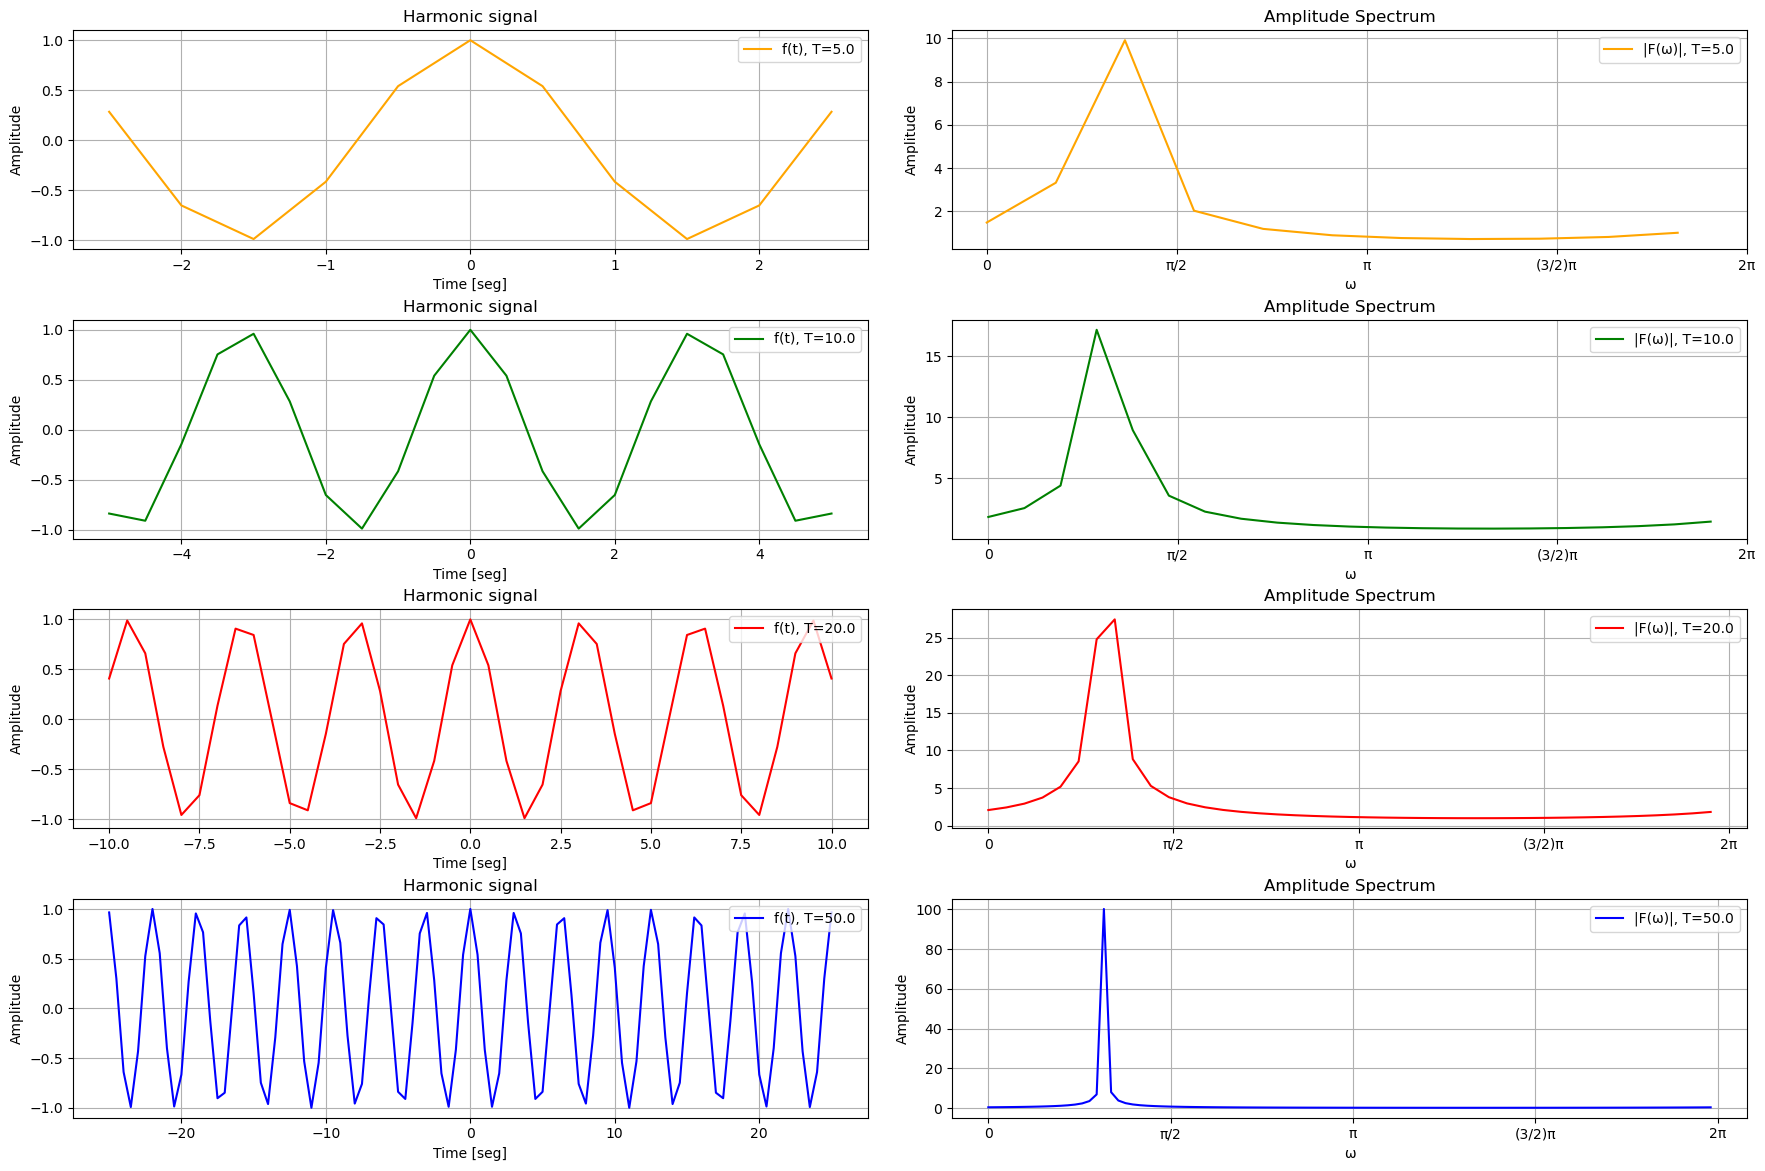

In [6]:
T=[5.0,10.0,20.0,50.0];
dt=0.5;
ω0= 2.0;


# ploting the results
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 12))
fig.tight_layout(pad=3.0)
colors=["orange","green","red","blue"]

for i in 1:4
    f,amp,phase,t,w,periodo=exercise3(dt,ω0,T[i])
    axs[i,1].plot(t,real.(f), c=colors[i], label="f(t), T=$periodo")
    axs[i,1].grid("True")
    axs[i,1].set_title("Harmonic signal")
    axs[i,1].set_xlabel("Time [seg]")
    axs[i,1].set_ylabel("Amplitude")
    axs[i,1].legend(loc="upper right")
    
    
    axs[i,2].plot(w,amp, c=colors[i], label="|F(ω)|, T=$periodo")
    axs[i,2].grid("True")
    axs[i,2].set_title("Amplitude Spectrum")
    axs[i,2].set_xlabel("ω")
    axs[i,2].set_xticks(0:π/2:2*π)
    axs[i,2].set_xticklabels(["0", "π/2", "π", "(3/2)π", "2π"])
    axs[i,2].set_ylabel("Amplitude")
    axs[i,2].legend(loc="best")
end
    

**The signal has only one frequency, therefore we expect a $\delta$ function in its spectrum**.

In the first three plots the window length is not long enough, which means that we are convolving the Fourier Transform of the signal with a broad $sinc$ function. Consequently, there is not enough resolution to see exactly where the peak is, and the energy seems to be scattered around a group of frequencies around the maximum of the spectrum. 

In the last case, we observe 50 periods of the signal, and we can observe in the bottom-right panel that the amplitude spectrum of the signals approximates better the $\delta$ function since we are convolving the Fourier Transform of the signal with a narrower $sinc$ function.

$\;\;\;\;\;\;$

$\;\;\;\;\;\;$

$\;\;\;\;\;\;$

$\;\;\;\;\;\;$


### 5) Compute the Fourier Transform of the following singals:


$f\left(t\right) = A_{1}e^{i\omega_1t}+ A_{2}e^{i\omega_2t}$  $t=\left[ \frac{-T}{2},\frac{T}{2}\right]$ and $\omega_1 =0.30$ rad/seg and $\omega_2=0.35$ rad/seg.





$f\left(t\right) = A_{1}e^{i\omega_1t}+ A_{2}e^{i\omega_2t}$

$f_T\left(t\right)= f\left(t\right) w\left(t\right)= [A_{1}e^{i\omega_1t}+ A_{2}e^{i\omega_2t}] w\left(t\right)$

$\mathcal{F} \left\{f_T\left(t\right) \right\}$ = $\mathcal{F}\left\{[A_{1}e^{i\omega_1t}+ A_{2}e^{i\omega_2t}]w\left(t\right) \right\} = \mathcal{F} \left\{A_{1}e^{i\omega_1t} w\left(t\right)\right\} + \left\{A_{2}e^{i\omega_2t}w\left(t\right)\right\}$ 

$\mathcal{F} \left\{A_{1}e^{i\omega_1t} w\left(t\right)\right\} + \left\{A_{2}e^{i\omega_2t}w\left(t\right)\right\}= T sinc((\omega-\omega_1)\frac{T}{2}) + T sinc((\omega-\omega_2)\frac{T}{2}) $ 



In [148]:
#function to compute to sincs that are the TF of the two functions.

function exercise5(T :: Float64, ω1 :: Float64, ω2 :: Float64 )
    
    dω=0.01;
    ω= -5.0:dω:5.0;
    n=length(ω)
    sinc1=zeros(n)
    sinc2=zeros(n)
    sinc1= abs.(T*sinc.((ω .-ω1)*T/2))
    sinc2= abs.(T*sinc.((ω .-ω2)*T/2))
    return ω, sinc1, sinc2;
end



exercise5 (generic function with 1 method)

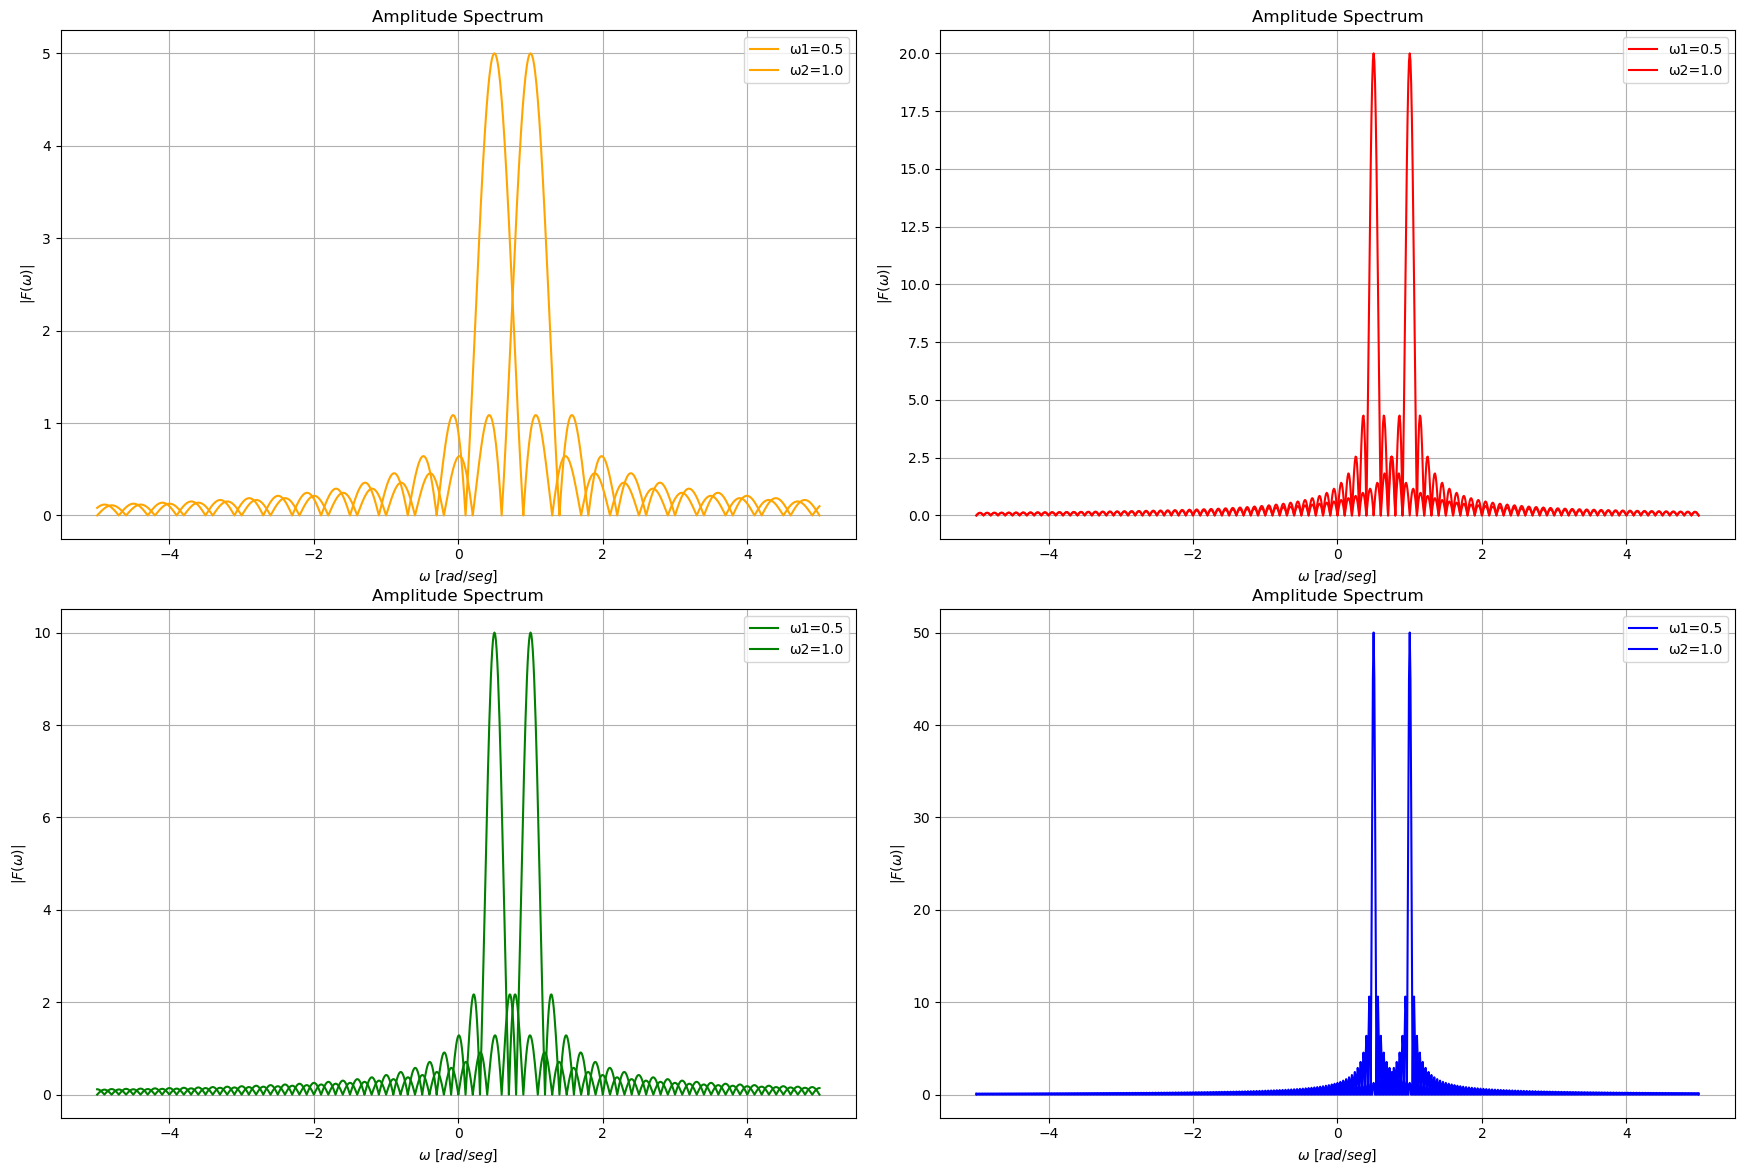

In [178]:
T=[5.0,10.0,20.0,50.0];
ω1=0.5;
ω2=1.0;


# ploting the results
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.tight_layout(pad=3.0)
colors=["orange","green","red","blue"]

for i in 1:2
    #f,amp,phase,t,w,periodo=exercise3(dt,ω0,T[i])
    ω,s1,s2=exercise5(T[i],ω1,ω2);
    axs[i,1].plot(ω,s1, c=colors[i], label="ω1=$ω1")
    axs[i,1].plot(ω,s2, c=colors[i], label="ω2=$ω2")
    axs[i,1].grid("True")
    axs[i,1].set_title("Amplitude Spectrum")
    axs[i,1].set_xlabel(L"ω~[rad/seg]")
    axs[i,1].set_ylabel(L"|F(ω)|")
    axs[i,1].legend(loc="upper right")
    
    ω,s1,s2=exercise5(T[i+2],ω1,ω2);
    axs[i,2].plot(ω,s1, c=colors[i+2], label="ω1=$ω1")
    axs[i,2].plot(ω,s2, c=colors[i+2], label="ω2=$ω2")
    axs[i,2].grid("True")
    axs[i,2].set_title("Amplitude Spectrum")
    axs[i,2].set_xlabel(L"ω~[rad/seg]")
    axs[i,2].set_ylabel(L"|F(ω)|")
    axs[i,2].legend(loc="upper right")
    
end

    
    

Function to calculate two different complex exponential signal of frequency $\omega_1$  and $\omega_2$ whitin time range $t=\left[ \frac{-T}{2},\frac{T}{2}\right]$ and their Fourier Transform:

In [16]:
#This is not goi

function exercise4(dt :: Float64, ω1 :: Float64, ω2 :: Float64, T:: Float64)
   
    t=collect(-T/2:dt:T/2);
    #f=cos.(ω0*t)
    f1= exp.(1im*ω1*t);
    fr1=real(f1);
    f2=exp.(1im*ω2*t);
    fr2=real(f2);
    dw= 2π/length(t);
    w= dw*(0:length(t)-1);
    F1=fft(f1);
    F2=fft(f2);
    amp1=abs.(F1);
    amp2=abs.(F2);

    
    #phase=angle.(F1);
    
    return f1,f2,amp1,amp2,t,w,T
end


exercise4 (generic function with 1 method)

Ploting the amplitude spectrum of the sum of the signals for different values of the time period given by  $T=\left[5.0,10.0,20.0,50.0\right]$ sec.

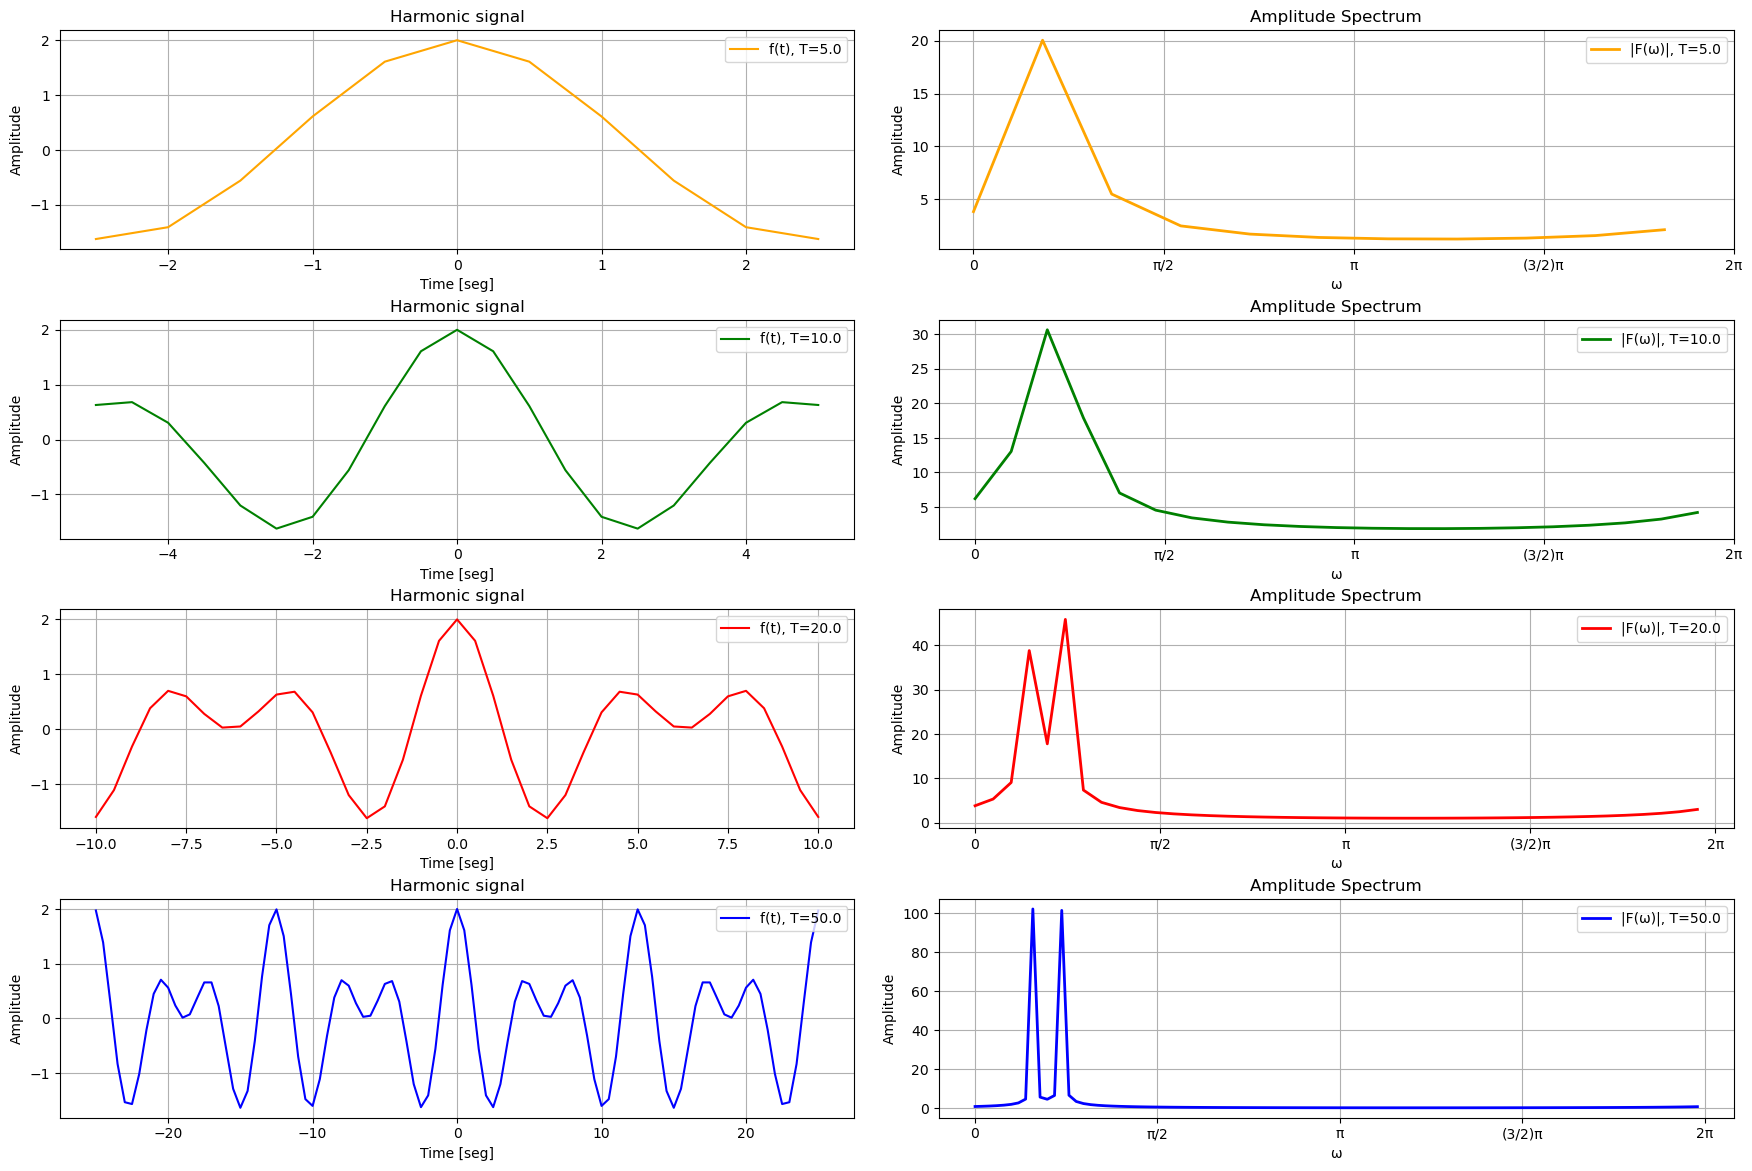

In [17]:


T=[5.0,10.0,20.0,50.0];
dt=0.5;
ω1= 1.0;
ω2= 1.5;


fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 12))
fig.tight_layout(pad=3.0)
#colors=["RoyalBlue","LimeGreen","Sgibeet", "Salmon"];
colors=["orange","green","red","blue"]
for i in 1:4
    f1,f2,amp1,amp2,t,w,periodo=exercise4(dt,ω1,ω2,T[i])
    axs[i,1].plot(t,real.((f1+f2)), c=colors[i], label="f(t), T=$periodo")
    axs[i,1].grid("True")
    axs[i,1].set_title("Harmonic signal")
    axs[i,1].set_xlabel("Time [seg]")
    axs[i,1].set_ylabel("Amplitude")
    axs[i,1].legend(loc="upper right")
    
    
    axs[i,2].plot(w,(amp1+amp2), c=colors[i], linewidth=2, label="|F(ω)|, T=$periodo")
    axs[i,2].grid("True")
    axs[i,2].set_title("Amplitude Spectrum")
    axs[i,2].set_xlabel("ω")
    axs[i,2].set_xticks(0:π/2:2*π)
    axs[i,2].set_xticklabels(["0", "π/2", "π", "(3/2)π", "2π"])
    axs[i,2].set_ylabel("Amplitude")
    axs[i,2].legend(loc="best")
end



Clearly, **if we do not observe the signal for enough time, we will not be able to reproduce the spectrum in an accurate manner**. If this happens, we may not have enough resolution to distinguish the two peaks in the spectrum and understand the signal. 



In this case, the signal is composed of two frequencies, but if we do not observe at least $20$ periods of the signal, we cannot realize it. This situation is not appropriate to apply filters or further processing techniques.

##### END